In [146]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

In [64]:
os.chdir('C://Users//Thanis//Desktop//Data Science//Machine Learing//Housing')

In [65]:
h_train = pd.read_csv('wk3_kc_house_train_data.csv')
h_test = pd.read_csv('wk3_kc_house_test_data.csv')
h_valid = pd.read_csv('wk3_kc_house_valid_data.csv')

In [7]:
X_train = h_train[['bedrooms', 'bathrooms', 'sqft_living' , 'floors','view', 'grade', 'condition', 'sqft_above',
       'sqft_basement','yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']]
y_train = h_train[['price']]

In [66]:
h_train['price'] = np.log(h_train['price'])
h_train['sqft_living'] = np.log(h_train['sqft_living'])

In [67]:
X_train = h_train[['bedrooms', 'bathrooms', 'sqft_living' ,'sqft_living15', 'floors', 'grade', 'zipcode', 'lat', 'long']]
y_train = h_train[['price']]

In [133]:
X_train = h_train[['sqft_living']]
y_train = h_train[['price']]

In [68]:
polynomial_features = PolynomialFeatures(degree=4)
X_degree_train = polynomial_features.fit_transform(X_train)
polynomial_model = LinearRegression()
polynomial_model_train_degn = polynomial_model.fit(X_degree_train, y_train)
y_pred_train = polynomial_model_train_degn.predict(X_degree_train)

In [69]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
print(rmse_train)
print(r2_train)

0.21412307991332952
0.8378027223054154


In [107]:
#X_degree_train = polynomial_features.fit_transform(X_train)

In [70]:
accuracy = polynomial_model.score(X_degree_train, y_train)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 84%'

In [71]:
h_test['price'] = np.log(h_test['price'])
#h_train['sqft_lot'] = np.log(h_train['sqft_lot'])
h_test['sqft_living'] = np.log(h_test['sqft_living'])

In [72]:
X_test = h_test[['bedrooms', 'bathrooms', 'sqft_living' ,'sqft_living15', 'floors', 'grade', 'zipcode', 'lat', 'long']]
y_test = h_test[['price']]

In [73]:
X_degree_test = polynomial_features.fit_transform(X_test)
y_pred_test = polynomial_model_train_degn.predict(X_degree_test)

In [74]:
rmse_train = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_test, y_pred_test)
print(rmse_train)
print(r2_train)

0.22499520316116836
0.8189641015400735


In [75]:
accuracy = polynomial_model.score(X_degree_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 82%'

In [76]:
h_valid['price'] = np.log(h_valid['price'])
#h_train['sqft_lot'] = np.log(h_train['sqft_lot'])
h_valid['sqft_living'] = np.log(h_valid['sqft_living'])

In [77]:
X_valid = h_valid[['bedrooms', 'bathrooms', 'sqft_living' ,'sqft_living15', 'floors', 'grade', 'zipcode', 'lat', 'long']]
y_valid = h_valid[['price']]

In [78]:
X_degree_valid = polynomial_features.fit_transform(X_valid)
y_pred_valid = polynomial_model_train_degn.predict(X_degree_valid)

In [79]:
rmse_train = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
r2_train = r2_score(y_valid, y_pred_valid)
print(rmse_train)
print(r2_train)

0.2225769621307759
0.8175348139738131


In [80]:
accuracy = polynomial_model.score(X_degree_valid, y_valid)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 82%'

In [81]:
def get_score(y_valid,y_pred_valid, X_degree_valid):
    
    print('R2: {}'.format(r2_score(y_valid, y_pred_valid)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_valid, y_pred_valid))))
    accuracy = polynomial_model.score(X_degree_valid, y_valid)
    print("Accuracy: {}%".format(int(round(accuracy * 100))))

In [82]:
y_pred_train = polynomial_model_train_degn.predict(X_degree_train)
print("Train")
get_score(y_train,y_pred_train,  X_degree_train)
y_pred_test = polynomial_model_train_degn.predict(X_degree_test)
print("Test")
get_score(y_test, y_pred_test,  X_degree_test)
y_pred_valid = polynomial_model_train_degn.predict(X_degree_valid)
print("Valid")
get_score(y_valid,y_pred_valid, X_degree_valid)

Train
R2: 0.8378027223054154
RMSE: 0.21412307991332952
Accuracy: 84%
Test
R2: 0.8189641015400735
RMSE: 0.22499520316116836
Accuracy: 82%
Valid
R2: 0.8175348139738131
RMSE: 0.2225769621307759
Accuracy: 82%


In [21]:
corrMatrix = h_train.corr()

In [23]:
import seaborn as sns

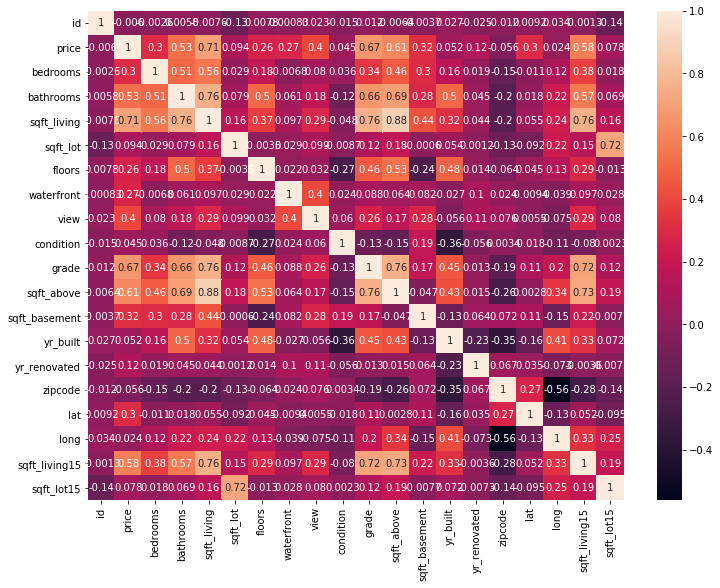

In [81]:
plt.subplots(figsize=(12, 9))
sns.heatmap(corrMatrix, annot=True)
plt.show()

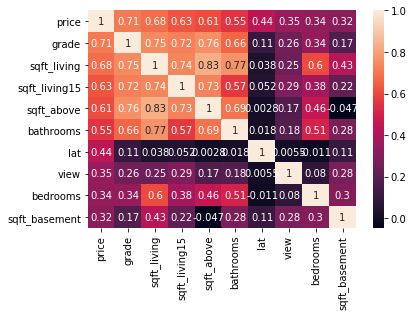

In [40]:
cols = corrMatrix.nlargest(10, 'price')['price'].index
cm = np.corrcoef(h_train[cols], rowvar=False)
hm = sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols.values, xticklabels=cols.values)

In [142]:
h_train = pd.read_csv('wk3_kc_house_train_data.csv')
h_test = pd.read_csv('wk3_kc_house_test_data.csv')
h_valid = pd.read_csv('wk3_kc_house_valid_data.csv')

h_train['price'] = np.log(h_train['price'])
h_train['sqft_living'] = np.log(h_train['sqft_living'])
h_test['price'] = np.log(h_test['price'])
h_test['sqft_living'] = np.log(h_test['sqft_living'])
h_valid['price'] = np.log(h_valid['price'])
h_valid['sqft_living'] = np.log(h_valid['sqft_living'])

X_train = h_train['sqft_living'].values.reshape(-1,1)
y_train = h_train['price'].values.reshape(-1,1)
X_test = h_test['sqft_living'].values.reshape(-1,1)
y_test = h_test['price'].values.reshape(-1,1)
X_valid = h_valid['sqft_living'].values.reshape(-1,1)
y_valid = h_valid['price'].values.reshape(-1,1)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
y_pres_valid = regressor.predict(X_valid)


rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rmsemlr_test = float(format(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_test))),'.3f'))
rmsemlr_valid = float(format(np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(y_pred_valid))),'.3f'))
rtrmlr = float(format(regressor.score(X_train,y_train),'.3f'))
rtemlr = float(format(regressor.score(X_test,y_test),'.3f'))
rtvmlr = float(format(regressor.score(X_valid,y_valid),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
r2_test = float(format(r2_score(y_test, y_pred_test),'.3f'))
r2_valid = float(format(r2_score(y_valid, y_pred_valid),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Simple Linear Regression','One features, preprocessing',rmsemlr_train,rmsemlr_test,rmsemlr_valid,rtrmlr,rtemlr,rtvmlr]
evaluation_poly

,Model,Details,Root Mean Squared Error Train(RMSE),Root Mean Squared Error Test(RMSE),Root Mean Squared Error Valid(RMSE),R-squared (training),R-squared (test),R-squared (valid)
0,Polynomial Regression,"degree=2, all features, no preprocessing",150122.400,165604.367,159168.279,0.844,0.786,0.800
1,Polynomial Regression,"degree=2, all features, no preprocessing",161559.765,166726.760,198275.907,0.838,0.819,0.818
2,Decision Tree,"selected features, preprocessing",129885.758,159279.626,171568.278,0.908,0.830,0.818
3,Multiple Linear Regression,"degree=2, all features, no preprocessing",207847.820,200259.746,644985.362,0.700,0.688,0.700
4,Multiple Linear Regression,"All features, preprocessing",182911.582,187601.042,171568.278,0.778,0.762,0.769
5,Multiple Linear Regression,"Seleceted features, preprocessing",190333.890,191130.682,171568.278,0.773,0.760,0.766
6,Simple Linear Regression,"One features, preprocessing",288951.851,270291.819,171568.278,0.462,0.462,0.447


In [144]:
h_train = pd.read_csv('wk3_kc_house_train_data.csv')
h_test = pd.read_csv('wk3_kc_house_test_data.csv')
h_valid = pd.read_csv('wk3_kc_house_valid_data.csv')

X_train = h_train['sqft_living'].values.reshape(-1,1)
y_train = h_train['price'].values.reshape(-1,1)
X_test = h_test['sqft_living'].values.reshape(-1,1)
y_test = h_test['price'].values.reshape(-1,1)
X_valid = h_valid['sqft_living'].values.reshape(-1,1)
y_valid = h_valid['price'].values.reshape(-1,1)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
y_pres_valid = regressor.predict(X_valid)


rmsemlr_train = float(format(np.sqrt(mean_squared_error(y_train,y_pred_train)),'.3f'))
rmsemlr_test = float(format(np.sqrt(mean_squared_error(y_test,y_pred_test)),'.3f'))
rmsemlr_valid = float(format(np.sqrt(mean_squared_error(y_valid,y_pred_valid)),'.3f'))
rtrmlr = float(format(regressor.score(X_train,y_train),'.3f'))
rtemlr = float(format(regressor.score(X_test,y_test),'.3f'))
rtvmlr = float(format(regressor.score(X_valid,y_valid),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
r2_test = float(format(r2_score(y_test, y_pred_test),'.3f'))
r2_valid = float(format(r2_score(y_valid, y_pred_valid),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Simple Linear Regression','One features, no preprocessing',rmsemlr_train,rmsemlr_test,rmsemlr_valid,rtrmlr,rtemlr,rtvmlr]
evaluation_poly

,Model,Details,Root Mean Squared Error Train(RMSE),Root Mean Squared Error Test(RMSE),Root Mean Squared Error Valid(RMSE),R-squared (training),R-squared (test),R-squared (valid)
0,Polynomial Regression,"degree=2, all features, no preprocessing",150122.400,165604.367,159168.279,0.844,0.786,0.800
1,Polynomial Regression,"degree=2, all features, no preprocessing",161559.765,166726.760,198275.907,0.838,0.819,0.818
2,Decision Tree,"selected features, preprocessing",129885.758,159279.626,171568.278,0.908,0.830,0.818
3,Multiple Linear Regression,"degree=2, all features, no preprocessing",207847.820,200259.746,644985.362,0.700,0.688,0.700
4,Multiple Linear Regression,"All features, preprocessing",182911.582,187601.042,171568.278,0.778,0.762,0.769
5,Multiple Linear Regression,"Seleceted features, preprocessing",190333.890,191130.682,171568.278,0.773,0.760,0.766
6,Simple Linear Regression,"One features, preprocessing",288951.851,270291.819,171568.278,0.462,0.462,0.447
7,Simple Linear Regression,"One features, no preprocessing",269130.236,253391.903,644985.362,0.497,0.500,0.485


In [135]:
h_train = pd.read_csv('wk3_kc_house_train_data.csv')
h_test = pd.read_csv('wk3_kc_house_test_data.csv')
h_valid = pd.read_csv('wk3_kc_house_valid_data.csv')

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

X_train = h_train[features]
y_train = h_train['price']
X_test = h_test[features]
y_test = h_test['price']
X_valid = h_valid[features]
y_valid = h_valid['price']

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
y_pres_valid = regressor.predict(X_valid)

rmsemlr_train = float(format(np.sqrt(mean_squared_error(y_train,y_pred_train)),'.3f'))
rmsemlr_test = float(format(np.sqrt(mean_squared_error(y_test,y_pred_test)),'.3f'))
rmsemlr_valid = float(format(np.sqrt(mean_squared_error(y_valid,y_pred_valid)),'.3f'))
rtrmlr = float(format(regressor.score(X_train,y_train),'.3f'))
rtemlr = float(format(regressor.score(X_test,y_test),'.3f'))
rtvmlr = float(format(regressor.score(X_valid,y_valid),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
r2_test = float(format(r2_score(y_test, y_pred_test),'.3f'))
r2_valid = float(format(r2_score(y_valid, y_pred_valid),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Multiple Linear Regression','All features, no preprocessing',rmsemlr_train,rmsemlr_test,rmsemlr_valid,rtrmlr,rtemlr,rtvmlr]
evaluation_poly

,Model,Details,Root Mean Squared Error Train(RMSE),Root Mean Squared Error Test(RMSE),Root Mean Squared Error Valid(RMSE),R-squared (training),R-squared (test),R-squared (valid)
0,Polynomial Regression,"degree=2, all features, no preprocessing",150122.400,165604.367,159168.279,0.844,0.786,0.800
1,Polynomial Regression,"degree=2, all features, no preprocessing",161559.765,166726.760,198275.907,0.838,0.819,0.818
2,Decision Tree,"selected features, preprocessing",129885.758,159279.626,171568.278,0.908,0.830,0.818
3,Multiple Linear Regression,"degree=2, all features, no preprocessing",207847.820,200259.746,644985.362,0.700,0.688,0.700


In [136]:
h_train = pd.read_csv('wk3_kc_house_train_data.csv')
h_test = pd.read_csv('wk3_kc_house_test_data.csv')
h_valid = pd.read_csv('wk3_kc_house_valid_data.csv')

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

h_train['price'] = np.log(h_train['price'])
h_train['sqft_living'] = np.log(h_train['sqft_living'])
h_test['price'] = np.log(h_test['price'])
h_test['sqft_living'] = np.log(h_test['sqft_living'])
h_valid['price'] = np.log(h_valid['price'])
h_valid['sqft_living'] = np.log(h_valid['sqft_living'])

X_train = h_train[features]
y_train = h_train['price']
X_test = h_test[features]
y_test = h_test['price']
X_valid = h_valid[features]
y_valid = h_valid['price']

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
y_pres_valid = regressor.predict(X_valid)

rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rmsemlr_test = float(format(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_test))),'.3f'))
rmsemlr_valid = float(format(np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(y_pred_valid))),'.3f'))
rtrmlr = float(format(regressor.score(X_train,y_train),'.3f'))
rtemlr = float(format(regressor.score(X_test,y_test),'.3f'))
rtvmlr = float(format(regressor.score(X_valid,y_valid),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
r2_test = float(format(r2_score(y_test, y_pred_test),'.3f'))
r2_valid = float(format(r2_score(y_valid, y_pred_valid),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Multiple Linear Regression','All features, preprocessing',rmsemlr_train,rmsemlr_test,rmsemlr_valid,rtrmlr,rtemlr,rtvmlr]
evaluation_poly

,Model,Details,Root Mean Squared Error Train(RMSE),Root Mean Squared Error Test(RMSE),Root Mean Squared Error Valid(RMSE),R-squared (training),R-squared (test),R-squared (valid)
0,Polynomial Regression,"degree=2, all features, no preprocessing",150122.400,165604.367,159168.279,0.844,0.786,0.800
1,Polynomial Regression,"degree=2, all features, no preprocessing",161559.765,166726.760,198275.907,0.838,0.819,0.818
2,Decision Tree,"selected features, preprocessing",129885.758,159279.626,171568.278,0.908,0.830,0.818
3,Multiple Linear Regression,"degree=2, all features, no preprocessing",207847.820,200259.746,644985.362,0.700,0.688,0.700
4,Multiple Linear Regression,"All features, preprocessing",182911.582,187601.042,171568.278,0.778,0.762,0.769


In [137]:
h_train = pd.read_csv('wk3_kc_house_train_data.csv')
h_test = pd.read_csv('wk3_kc_house_test_data.csv')
h_valid = pd.read_csv('wk3_kc_house_valid_data.csv')

features = ['bedrooms', 'bathrooms', 'sqft_living' , 'floors','view', 'grade', 'condition', 'sqft_above',
       'sqft_basement','yr_built', 'yr_renovated', 'zipcode', 'lat', 'long','sqft_living15']

h_train['price'] = np.log(h_train['price'])
h_train['sqft_living'] = np.log(h_train['sqft_living'])
h_test['price'] = np.log(h_test['price'])
h_test['sqft_living'] = np.log(h_test['sqft_living'])
h_valid['price'] = np.log(h_valid['price'])
h_valid['sqft_living'] = np.log(h_valid['sqft_living'])

X_train = h_train[features]
y_train = h_train['price']
X_test = h_test[features]
y_test = h_test['price']
X_valid = h_valid[features]
y_valid = h_valid['price']

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
y_pres_valid = regressor.predict(X_valid)

rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rmsemlr_test = float(format(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_test))),'.3f'))
rmsemlr_valid = float(format(np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(y_pred_valid))),'.3f'))
rtrmlr = float(format(regressor.score(X_train,y_train),'.3f'))
rtemlr = float(format(regressor.score(X_test,y_test),'.3f'))
rtvmlr = float(format(regressor.score(X_valid,y_valid),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
r2_test = float(format(r2_score(y_test, y_pred_test),'.3f'))
r2_valid = float(format(r2_score(y_valid, y_pred_valid),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Multiple Linear Regression','Seleceted features, preprocessing',rmsemlr_train,rmsemlr_test,rmsemlr_valid,rtrmlr,rtemlr,rtvmlr]
evaluation_poly

,Model,Details,Root Mean Squared Error Train(RMSE),Root Mean Squared Error Test(RMSE),Root Mean Squared Error Valid(RMSE),R-squared (training),R-squared (test),R-squared (valid)
0,Polynomial Regression,"degree=2, all features, no preprocessing",150122.400,165604.367,159168.279,0.844,0.786,0.800
1,Polynomial Regression,"degree=2, all features, no preprocessing",161559.765,166726.760,198275.907,0.838,0.819,0.818
2,Decision Tree,"selected features, preprocessing",129885.758,159279.626,171568.278,0.908,0.830,0.818
3,Multiple Linear Regression,"degree=2, all features, no preprocessing",207847.820,200259.746,644985.362,0.700,0.688,0.700
4,Multiple Linear Regression,"All features, preprocessing",182911.582,187601.042,171568.278,0.778,0.762,0.769
5,Multiple Linear Regression,"Seleceted features, preprocessing",190333.890,191130.682,171568.278,0.773,0.760,0.766


In [150]:
h_train = pd.read_csv('wk3_kc_house_train_data.csv')
h_test = pd.read_csv('wk3_kc_house_test_data.csv')
h_valid = pd.read_csv('wk3_kc_house_valid_data.csv')

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

X_train = h_train[features]
y_train = h_train[['price']]
X_test = h_test[features]
y_test = h_test[['price']]
X_valid = h_valid[features]
y_valid = h_valid[['price']]

knnreg = KNeighborsRegressor(n_neighbors=15)
knnreg.fit(X_train, y_train)


y_pred_train = knnreg.predict(X_train)
y_pred_test = knnreg.predict(X_test)
y_pred_valid = knnreg.predict(X_valid)

rmsepoly_train = float(format(np.sqrt(mean_squared_error(y_train,y_pred_train)),'.3f'))
rmsepoly_test = float(format(np.sqrt(mean_squared_error(y_test,y_pred_test)),'.3f'))
rmsepoly_valid = float(format(np.sqrt(mean_squared_error(y_valid,y_pred_valid)),'.3f'))
rtrpoly = float(format(knnreg.score(X_train,y_train),'.3f'))
rtepoly = float(format(knnreg.score(X_test,y_test),'.3f'))
rtvpoly = float(format(knnreg.score(X_valid,y_valid),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
r2_test = float(format(r2_score(y_test, y_pred_test),'.3f'))
r2_valid = float(format(r2_score(y_valid, y_pred_valid),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['KNN','All features, no preprocessing',rmsepoly_train,rmsepoly_test,rmsepoly_valid,rtrpoly,rtepoly,rtvpoly]
evaluation_poly

,Model,Details,Root Mean Squared Error Train(RMSE),Root Mean Squared Error Test(RMSE),Root Mean Squared Error Valid(RMSE),R-squared (training),R-squared (test),R-squared (valid)
0,Polynomial Regression,"degree=2, all features, no preprocessing",150122.400,165604.367,159168.279,0.844,0.786,0.800
1,Polynomial Regression,"degree=2, all features, no preprocessing",161559.765,166726.760,198275.907,0.838,0.819,0.818
2,Decision Tree,"selected features, preprocessing",129885.758,159279.626,171568.278,0.908,0.830,0.818
3,Multiple Linear Regression,"degree=2, all features, no preprocessing",207847.820,200259.746,644985.362,0.700,0.688,0.700
4,Multiple Linear Regression,"All features, preprocessing",182911.582,187601.042,171568.278,0.778,0.762,0.769
5,Multiple Linear Regression,"Seleceted features, preprocessing",190333.890,191130.682,171568.278,0.773,0.760,0.766
6,Simple Linear Regression,"One features, preprocessing",288951.851,270291.819,171568.278,0.462,0.462,0.447
7,Simple Linear Regression,"One features, no preprocessing",269130.236,253391.903,644985.362,0.497,0.500,0.485
8,KNN,"All features, no preprocessing",254578.446,246703.741,257750.526,0.550,0.526,0.476


In [126]:
evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Root Mean Squared Error Train(RMSE)':[],
                                'Root Mean Squared Error Test(RMSE)':[],
                                'Root Mean Squared Error Valid(RMSE)':[],
                                'R-squared (training)':[],
                                'R-squared (test)':[],
                                'R-squared (valid)':[]})

h_train = pd.read_csv('wk3_kc_house_train_data.csv')
h_test = pd.read_csv('wk3_kc_house_test_data.csv')
h_valid = pd.read_csv('wk3_kc_house_valid_data.csv')

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

X_train = h_train[features]
y_train = h_train['price']
X_test = h_test[features]
y_test = h_test['price']
X_valid = h_valid[features]
y_valid = h_valid['price']

polynomial_features1 = PolynomialFeatures(degree=2)
X_trainpoly = polynomial_features1.fit_transform(X_train)
X_testpoly = polynomial_features1.fit_transform(X_test)
X_validpoly = polynomial_features1.fit_transform(X_valid)

polynomial_model = LinearRegression()
poly = polynomial_model.fit(X_trainpoly, y_train)

y_pred_train = poly.predict(X_trainpoly)
y_pred_test = poly.predict(X_testpoly)
y_pred_valid = poly.predict(X_validpoly)

rmsepoly_train = float(format(np.sqrt(mean_squared_error(y_train,y_pred_train)),'.3f'))
rmsepoly_test = float(format(np.sqrt(mean_squared_error(y_test,y_pred_test)),'.3f'))
rmsepoly_valid = float(format(np.sqrt(mean_squared_error(y_valid,y_pred_valid)),'.3f'))
rtrpoly = float(format(poly.score(X_trainpoly,y_train),'.3f'))
rtepoly = float(format(poly.score(X_testpoly,y_test),'.3f'))
rtvpoly = float(format(poly.score(X_validpoly,y_valid),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
r2_test = float(format(r2_score(y_test, y_pred_test),'.3f'))
r2_valid = float(format(r2_score(y_valid, y_pred_valid),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Polynomial Regression','degree=2, all features, no preprocessing',rmsepoly_train,rmsepoly_test,rmsepoly_valid,rtrpoly,rtepoly,rtvpoly]
evaluation_poly

,Model,Details,Root Mean Squared Error Train(RMSE),Root Mean Squared Error Test(RMSE),Root Mean Squared Error Valid(RMSE),R-squared (training),R-squared (test),R-squared (valid)
0,Polynomial Regression,"degree=2, all features, no preprocessing",150122.4,165604.367,159168.279,0.844,0.786,0.8


In [127]:
h_train = pd.read_csv('wk3_kc_house_train_data.csv')
h_test = pd.read_csv('wk3_kc_house_test_data.csv')
h_valid = pd.read_csv('wk3_kc_house_valid_data.csv')

features1 = ['bedrooms', 'bathrooms', 'sqft_living' ,'sqft_living15', 'floors', 'grade', 'zipcode', 'lat', 'long']

h_train['price'] = np.log(h_train['price'])
h_train['sqft_living'] = np.log(h_train['sqft_living'])
h_test['price'] = np.log(h_test['price'])
h_test['sqft_living'] = np.log(h_test['sqft_living'])
h_valid['price'] = np.log(h_valid['price'])
h_valid['sqft_living'] = np.log(h_valid['sqft_living'])

X_train = h_train[features1]
y_train = h_train[['price']]
X_test = h_test[features1]
y_test = h_test[['price']]
X_valid = h_valid[features1]
y_valid = h_valid[['price']]

polynomial_features = PolynomialFeatures(degree=4)
X_trainpoly = polynomial_features.fit_transform(X_train)
X_testpoly = polynomial_features.fit_transform(X_test)
X_validpoly = polynomial_features.fit_transform(X_valid)

polynomial_model = LinearRegression()
poly = polynomial_model.fit(X_trainpoly, y_train)

y_pred_train = poly.predict(X_trainpoly)
y_pred_test = poly.predict(X_testpoly)
y_pred_valid = poly.predict(X_validpoly)

rmsepoly3_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rmsepoly3_test = float(format(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_test))),'.3f'))
rmsepoly3_valid = float(format(np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(y_pred_valid))),'.3f'))
rtrpoly3 = float(format(poly.score(X_trainpoly,y_train),'.3f'))
rtepoly3 = float(format(poly.score(X_testpoly,y_test),'.3f'))
rtvpoly3 = float(format(poly.score(X_validpoly,y_valid),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
r2_test = float(format(r2_score(y_test, y_pred_test),'.3f'))
r2_valid = float(format(r2_score(y_valid, y_pred_valid),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Polynomial Regression','degree=4, selected features, preprocessing',rmsepoly3_train,rmsepoly3_test,rmsepoly3_valid,rtrpoly3,rtepoly3,rtvpoly3]
evaluation_poly

,Model,Details,Root Mean Squared Error Train(RMSE),Root Mean Squared Error Test(RMSE),Root Mean Squared Error Valid(RMSE),R-squared (training),R-squared (test),R-squared (valid)
0,Polynomial Regression,"degree=2, all features, no preprocessing",150122.400,165604.367,159168.279,0.844,0.786,0.800
1,Polynomial Regression,"degree=2, all features, no preprocessing",161559.765,166726.760,198275.907,0.838,0.819,0.818


In [133]:
h_train = pd.read_csv('wk3_kc_house_train_data.csv')
h_test = pd.read_csv('wk3_kc_house_test_data.csv')
h_valid = pd.read_csv('wk3_kc_house_valid_data.csv')

features2 = ['bedrooms', 'bathrooms', 'sqft_living', 'floors','view', 'grade', 'condition', 'sqft_above',
       'sqft_basement','yr_built', 'yr_renovated', 'zipcode', 'lat', 'long','sqft_living15','sqft_lot15','sqft_lot']

h_train['price'] = np.log(h_train['price'])
h_train['sqft_living'] = np.log(h_train['sqft_living'])
h_test['price'] = np.log(h_test['price'])
h_test['sqft_living'] = np.log(h_test['sqft_living'])
h_valid['price'] = np.log(h_valid['price'])
h_valid['sqft_living'] = np.log(h_valid['sqft_living'])

X_train = h_train[features2]
y_train = h_train[['price']]
X_test = h_test[features2]
y_test = h_test[['price']]
X_valid = h_valid[features2]
y_valid = h_valid[['price']]

d_model = DecisionTreeRegressor(max_depth=25, min_samples_leaf=8, min_samples_split=30)
d_model.fit(X_train, y_train)

y_pred_train = d_model.predict(X_train)
y_pred_test = d_model.predict(X_test)
y_pred_valid = d_model.predict(X_valid)

rmsepoly3_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rmsepoly3_test = float(format(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_test))),'.3f'))
rmsepoly3_valid = float(format(np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(y_pred_valid))),'.3f'))
rtrpoly3 = float(format(d_model.score(X_train,y_train),'.3f'))
rtepoly3 = float(format(d_model.score(X_test,y_test),'.3f'))
rtvpoly3 = float(format(d_model.score(X_valid,y_valid),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
r2_test = float(format(r2_score(y_test, y_pred_test),'.3f'))
r2_valid = float(format(r2_score(y_valid, y_pred_valid),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Decision Tree','selected features, preprocessing',rmsepoly3_train,rmsepoly3_test,rmsepoly3_valid,rtrpoly3,rtepoly3,rtvpoly3]
evaluation_poly

,Model,Details,Root Mean Squared Error Train(RMSE),Root Mean Squared Error Test(RMSE),Root Mean Squared Error Valid(RMSE),R-squared (training),R-squared (test),R-squared (valid)
0,Polynomial Regression,"degree=2, all features, no preprocessing",150122.400,165604.367,159168.279,0.844,0.786,0.800
1,Polynomial Regression,"degree=2, all features, no preprocessing",161559.765,166726.760,198275.907,0.838,0.819,0.818
2,Decision Tree,"selected features, preprocessing",129885.758,159279.626,171568.278,0.908,0.830,0.818


In [131]:
evaluation_poly.drop([2], inplace = True) 